In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

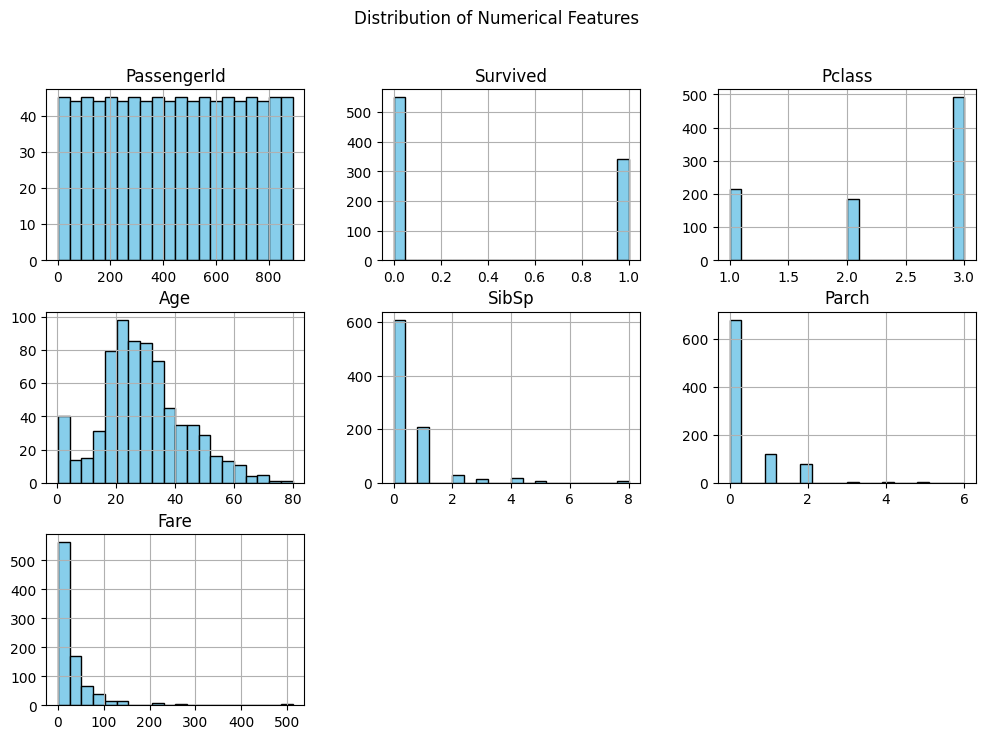

In [8]:
# Histogram for numerical columns
train_data.hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()



In [9]:
# Select numerical columns, exclude 'PassengerId' and 'Survived'
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(['PassengerId', 'Survived'])

print("Numeric columns for boxplots: ", numerical_columns.tolist())


Numeric columns for boxplots:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


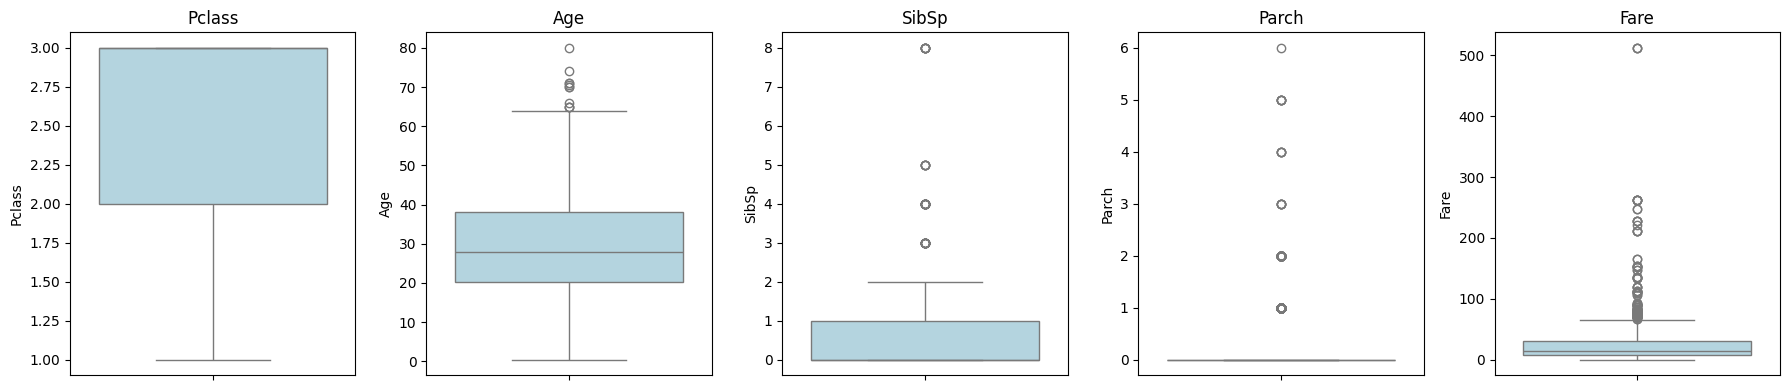

In [10]:
# Create a horizontal layout with subplots
plt.figure(figsize=(18, 4))  # width, height

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)  # 1 row, N columns
    sns.boxplot(y=train_data[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()


C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\2377825942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='Set2')


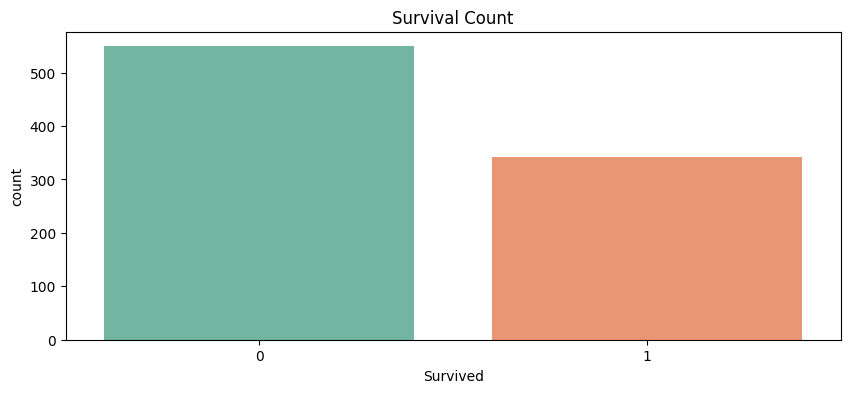

In [11]:
# Survival count by category
plt.figure(figsize=(10,4))
sns.countplot(x='Survived', data=train_data, palette='Set2')
plt.title('Survival Count')
plt.show()

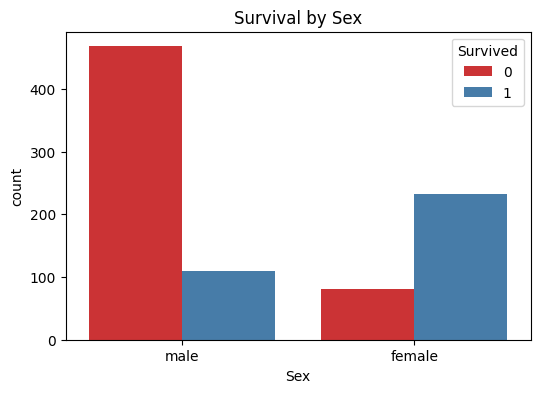

In [12]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set1')
plt.title('Survival by Sex')
plt.show()

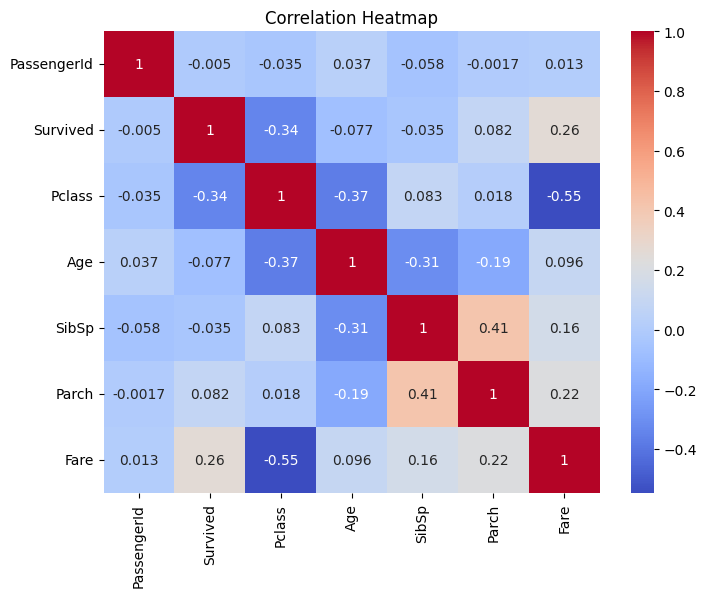

In [13]:
# Correlation heatmap (numerical features only)
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Extract the first letter of the Cabin (Deck)
train_data['Deck'] = train_data['Cabin'].astype(str).str[0]

# Fill missing Age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Verify no missing values left
print(train_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
dtype: int64


C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\1281716151.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\1281716151.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [16]:
# Replace 'n' (from 'nan') with 'U' for unknown
train_data['Deck'] = train_data['Deck'].replace('n', 'U')

# Then drop the original Cabin column
train_data = train_data.drop('Cabin', axis=1)

# Check deck values
print(train_data['Deck'].value_counts())


Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [17]:
# Encode 'Sex' as binary (0/1)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])

# One-hot encode 'Embarked' and 'Deck'
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Deck'], drop_first=True)


In [18]:
# Drop irrelevant columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Verify everything
print("Remaining columns:", train_data.columns)
print("\nAny missing values left?\n", train_data.isnull().sum().sum())

# Preview data
train_data.head()

Remaining columns: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')

Any missing values left?
 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,1,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,False,False,True,False,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,True,False,True,False,False,False,False,False,False
4,0,3,1,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,False,True


In [19]:
numerical_columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler

# Standard scaling
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [21]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(random_state=42, max_iter=500)

# Train model
model.fit(X_train, y_train)

print("✅ Logistic Regression training complete.")


✅ Logistic Regression training complete.


In [23]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)


       Feature  Coefficient
11      Deck_E     1.052390
12      Deck_F     0.650554
10      Deck_D     0.522769
8       Deck_B     0.217321
5         Fare     0.136275
4        Parch    -0.087751
6   Embarked_Q    -0.152770
14      Deck_T    -0.253795
9       Deck_C    -0.320610
3        SibSp    -0.327175
15      Deck_U    -0.361423
2          Age    -0.409164
7   Embarked_S    -0.436642
0       Pclass    -0.635437
13      Deck_G    -0.684549
1          Sex    -2.627511


Females, higher-class passengers, and those on upper decks had the best survival chances.

Males, older passengers, and lower-class travelers had lower chances.

Deck position and fare played an important role in determining survival probability.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [25]:
# Accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8812097812097812


In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[90 15]
 [19 55]]


In [27]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



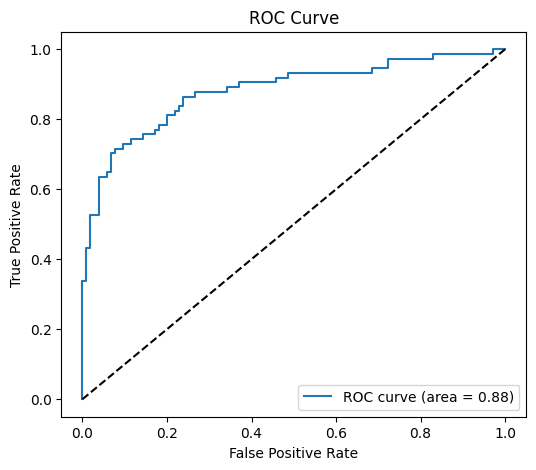

In [28]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [29]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [31]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
# Fill missing Age with median from train_data
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Fare with median from train_data
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Cabin has a lot of missing values → extract Deck
test_data['Cabin'] = test_data['Cabin'].astype(str)
test_data['Deck'] = test_data['Cabin'].str[0].replace('n', 'U')  # 'U' for unknown
test_data.drop('Cabin', axis=1, inplace=True)


C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\3112799224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\3112799224.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [35]:
# Encode Sex
le = LabelEncoder()
le.fit(test_data['Sex'])  # same fit as train_data
test_data['Sex'] = le.transform(test_data['Sex'])

# One-hot encode Embarked and Deck (drop first to avoid dummy trap)
test_data = pd.get_dummies(test_data, columns=['Embarked', 'Deck'], drop_first=True)


In [36]:
# Drop unnecessary columns
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Add missing columns if necessary
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

# Reorder columns
test_data = test_data[X_train.columns]


In [37]:
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [38]:
y_test_pred = model.predict(X_test)  # for your train/test split
y_test_prob = model.predict_proba(X_test)[:, 1]

print(y_test_pred)      # Shows predicted classes
print(y_test_prob)      # Shows predicted probabilities


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1]
[0.11076278 0.18835546 0.13211747 0.87053495 0.74700369 0.90653123
 0.68502963 0.08926354 0.76029804 0.95321214 0.2634526  0.06681454
 0.38751356 0.14652925 0.16643692 0.96279731 0.41497437 0.68507652
 0.20947465 0.2594744  0.11834237 0.32069693 0.6176387  0.13252701
 0.10756314 0.06776498 0.37768591 0.1894064  0.08069999 0.5984631
 0.13575543 0.66413531 0.47155865 0.62071012 0.13953788 0.1251241
 0.45613178 0.68502963 0.92067611 0.10583597 0.1726241  0.07837498
 0.10587602 0.13581097 0.57558433 0.09049166 0.13583996 0.12205303
 0.11810045 0.45902041 0.72748628 0.8412564  0.0395818  0.5727538
 0.04679901 0.97637889 0.18359538 0.

In [39]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8812097812097812


In [40]:
# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



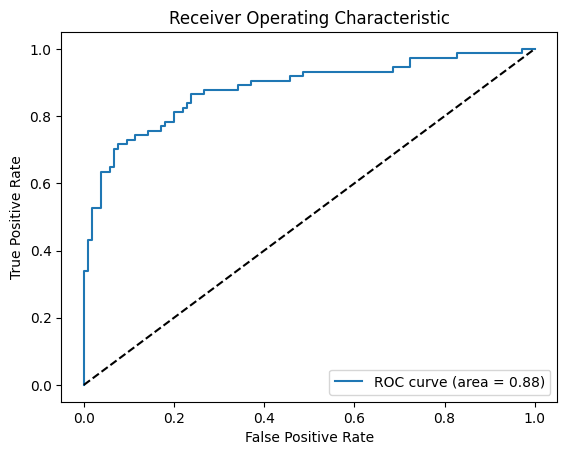

In [41]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_test_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)



       Feature  Coefficient
11      Deck_E     1.052390
12      Deck_F     0.650554
10      Deck_D     0.522769
8       Deck_B     0.217321
5         Fare     0.136275
4        Parch    -0.087751
6   Embarked_Q    -0.152770
14      Deck_T    -0.253795
9       Deck_C    -0.320610
3        SibSp    -0.327175
15      Deck_U    -0.361423
2          Age    -0.409164
7   Embarked_S    -0.436642
0       Pclass    -0.635437
13      Deck_G    -0.684549
1          Sex    -2.627511


C:\Users\Dhanya\AppData\Local\Temp\ipykernel_19820\2603770683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


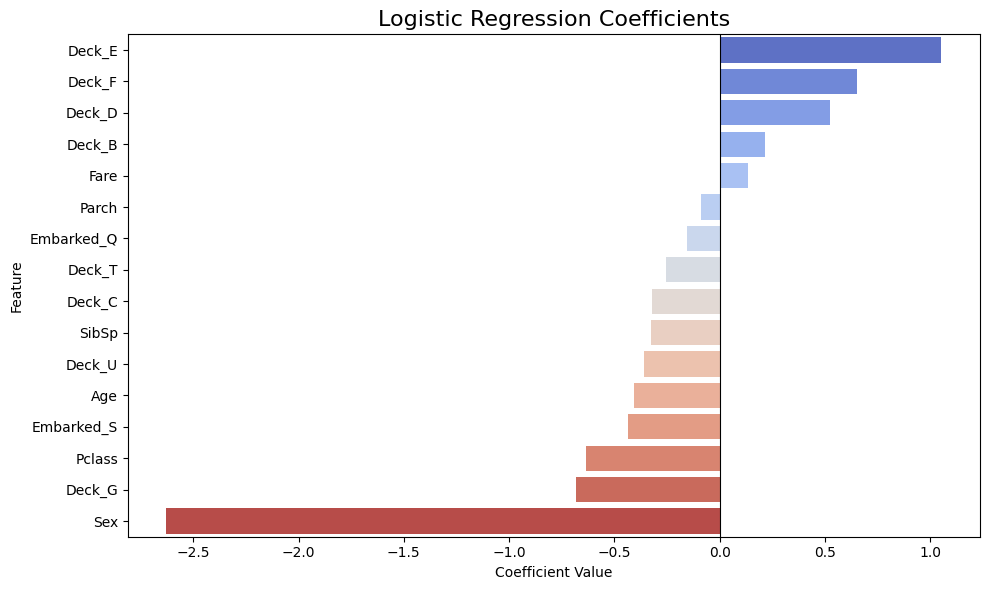

In [43]:
# Create DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


### Model Interpretation

The coefficients of the logistic regression model reveal how each feature impacts the log-odds of survival.
A **positive coefficient** means the feature increases the probability of survival; a **negative coefficient** means it decreases survival probability.

#### **Feature Analysis**

1. **Sex**
   The large negative coefficient for `Sex` (≈ -2.627) indicates that **being male significantly reduces the probability of survival** compared to being female.
   This matches historical Titanic data — females had higher survival rates.
   *(Note: This interpretation assumes your encoding is `male = 1`, `female = 0`. If your encoding differs, adjust accordingly.)*

2. **Pclass**
   The negative coefficient for `Pclass` means that **higher passenger class numbers (lower class)** decrease the chance of survival. Passengers in first class (Pclass = 1) had a higher survival probability.

3. **Age**
   A negative coefficient for `Age` suggests that **older passengers were less likely to survive**.

4. **Fare**
   The positive coefficient for `Fare` indicates that **passengers who paid higher fares had better survival chances**, likely because fare correlates with class and cabin location.

5. **Deck**
   Deck location mattered:

   * **Positive coefficients:** Decks E, F, and D — these passengers had higher survival probabilities.
   * **Negative coefficients:** Decks T, C, U, and G — lower survival chances.
   * Deck_U (“unknown” cabin) having a negative coefficient suggests missing cabin information is associated with lower survival rates.

6. **SibSp & Parch**
   Negative coefficients for `SibSp` (siblings/spouses aboard) and `Parch` (parents/children aboard) suggest that **larger family groups slightly decreased survival probability** — possibly due to the difficulty of coordinating escape.

7. **Embarked**
   Compared to Cherbourg (`Embarked_C`), passengers who embarked at Queenstown (`Embarked_Q`) or Southampton (`Embarked_S`) had slightly lower survival probabilities.

---

### **Summary**

The model highlights the most influential factors for survival on the Titanic:

* **Gender** (female had higher chances)
* **Passenger class** (1st class had higher chances)
* **Age** (younger passengers survived more)
* **Fare** (higher fare correlated with survival)
* **Cabin location** (Deck) had a significant effect
* **Family aboard** and **embarkation port** played smaller but notable roles.

In [44]:
import pickle

# Save the model
pickle.dump(model, open('model.sav', 'wb'))

# Save the scaler
pickle.dump(scaler, open('scaler.sav', 'wb'))

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


#**Interview questions:**

---

### **1. What is the difference between precision and recall?**

* **Precision** measures how accurate the positive predictions are.
  Formula:
  [
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  ]
  **Interpretation:** Out of all the predicted positives, how many were actually correct.
  **Example:** If a model predicts survivors on Titanic, precision answers: *“Of all predicted survivors, how many actually survived?”*

* **Recall** (also called Sensitivity or True Positive Rate) measures how well the model captures all actual positives.
  Formula:
  [
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  ]
  **Interpretation:** Out of all actual positives, how many were correctly predicted.
  **Example:** Recall answers: *“Of all actual survivors, how many did the model correctly identify?”*

**Key difference:**

* Precision → correctness of positive predictions.
* Recall → completeness in capturing actual positives.

---

### **2. What is cross-validation, and why is it important in binary classification?**

**Definition:**
Cross-validation is a technique to evaluate the performance of a model by splitting the dataset into multiple subsets (folds) and testing the model on different subsets.

**How it works:**

* Common method: **k-fold cross-validation** → split dataset into *k* folds.
* Train the model on *k-1* folds and test on the remaining fold.
* Repeat *k* times and average results for a robust performance estimate.

**Why it’s important in binary classification:**

* **Reduces overfitting**: Ensures the model performs well on unseen data, not just training data.
* **Provides reliable performance metrics**: Instead of a single train-test split, cross-validation gives an average score over multiple splits.
* **Better use of data**: All data points are used for both training and validation, improving reliability.

**Example:**
If we use cross-validation on a Titanic survival prediction model, we get a more stable estimate of accuracy, precision, recall, etc., and know the model’s performance is not dependent on a single data split.
